In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [187]:
data=pd.read_csv("ex2data1.txt",header=None)
X=data.iloc[:,:2]
y=data.iloc[:,2]

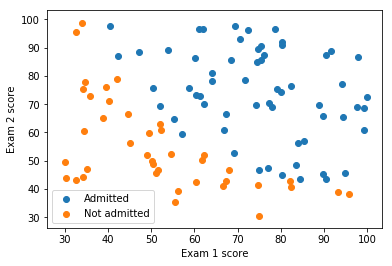

In [188]:
mask = y == 1
adm = plt.scatter(X[mask][0].values, X[mask][1].values)
not_adm = plt.scatter(X[~mask][0].values, X[~mask][1].values)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend((adm, not_adm), ('Admitted', 'Not admitted'))
plt.show()


In [189]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [190]:
sigmoid(np.inf)

1.0

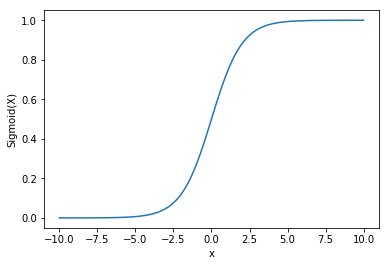

In [191]:
a = np.linspace(-10, 10, 100) 
b = 1/(1 + np.exp(-a)) 
  
plt.plot(a, b) 
plt.xlabel("x") 
plt.ylabel("Sigmoid(X)") 
  
plt.show()

In [192]:
def cost_func(x,y,theta):
    m=len(y)
    f1=np.multiply(y,np.log(sigmoid(x.dot(theta))))+np.multiply((1-y),np.log(1-sigmoid((x.dot(theta)))))
    co=(-1/m)*np.sum(f1)
    return co

In [193]:
(m, n) = X.shape
X = np.append(np.ones((m,1)),X,1)
y = y[:, np.newaxis]
theta = np.zeros((n+1,1)) # intializing theta with all zeros

In [194]:
cost_func(X,y,theta)

0.6931471805599453

In [195]:
def gradient_desc(x,y,alpha,itera,theta):
    store=[]
    m=len(y)
    for i in range(itera):
        error=sigmoid(x.dot(theta))
        pred=error-y
        error1=np.dot(x.T,pred)
        descent=alpha*1/m*error1
        theta-=descent
        store.append(cost_func(x,y,theta))
    return theta,store

In [196]:
def featureNormalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    
    X_norm = (X - mean)/std
    
    return X_norm,mean,std

In [197]:
data=pd.read_csv("ex2data1.txt",header=None)
X=data.iloc[:,:2]
y=data.iloc[:,2]
X,x_mean,x_std=featureNormalization(X)

In [198]:
(m, n) = X.shape
X = np.append(np.ones((m,1)),X,1)
y = y[:, np.newaxis]
theta = np.zeros((n+1,1))

In [199]:
alpha=0.01
itera=400
theta,cost=gradient_desc(X,y,alpha,itera,theta)

In [200]:
theta

array([[0.26567183],
       [0.74789721],
       [0.66872387]])

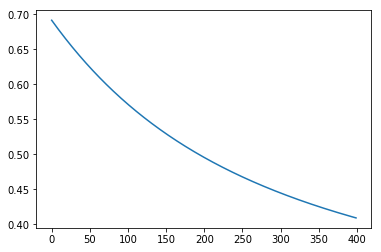

In [201]:
plt.plot(cost)
plt.show()

In [202]:
alpha=0.1
itera=400
theta,cost=gradient_desc(X,y,alpha,itera,theta)

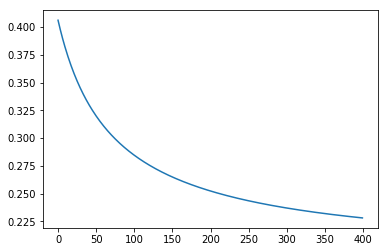

In [203]:
plt.plot(cost)
plt.show()

In [204]:
alpha=1
itera=400
theta,cost=gradient_desc(X,y,alpha,itera,theta)

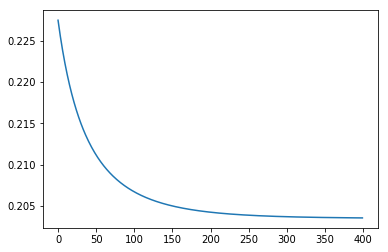

In [205]:
plt.plot(cost)
plt.show()

In [206]:
theta

array([[1.67287477],
       [3.89558164],
       [3.63107976]])

In [207]:
cost_func(X,y,theta)

0.20355796243639301

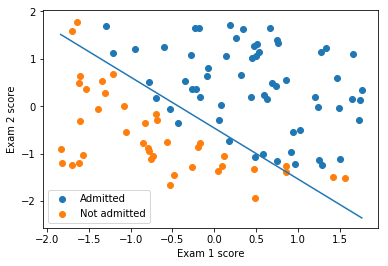

In [208]:
x_value= np.array([np.min(X[:,1]),np.max(X[:,1])])
y_value=-(theta[0] +theta[1]*x_value)/theta[2]
mask = y.flatten() == 1
adm = plt.scatter(X[mask][:,1], X[mask][:,2])
not_adm = plt.scatter(X[~mask][:,1], X[~mask][:,2])
decision_boun = plt.plot(x_value,y_value)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend((adm, not_adm), ('Admitted', 'Not admitted'))
plt.show()


In [217]:
x_test = np.array([47,85])
x_test = (x_test - x_mean)/x_std
x_test = np.append(np.ones(1),x_test)
prob = sigmoid(x_test.dot(theta))
print("admission probability",prob[0])

admission probability 0.8332938462580594


In [218]:
def out(a):
    if a<0.5:
        return 0
    return 1

In [219]:
out(prob[0])

1